# Regression

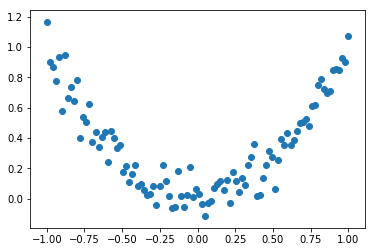

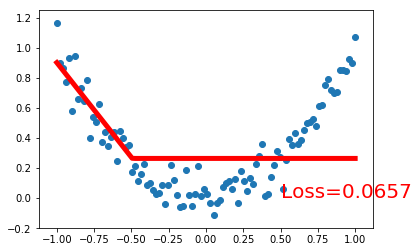

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 텐서플로우 시드 설정
tf.set_random_seed(1)

# 넘파이 랜덤 시드 설정.
np.random.seed(1)

# -1부터 1사이값을 100개로 쪼갬.
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)

# 0을 평균으로 하고 분산값이 0.1인 값들을 x의 크기만큼 배열로 만든다.
noise = np.random.normal(0, 0.1, size=x.shape)

# x^2 + noise 연산.
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# 차트에 그린다.
plt.scatter(x, y)

# 차트를 출력
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

# hidden layer 생성
# relu activation function을 사용.
# tf.layers.dense(입력, 유닛 갯수, acitvation function)
# hidden유닛 갯수가 많아질수록 곡선이 좀더 유연해진다.
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer1

l2 = tf.layers.dense(l1, 5, tf.nn.relu)            # hidden layer2

# 출력 노드.
output = tf.layers.dense(l2, 1)                     # output layer

# 노드를 거친 값과 실제값의 차이를 mean_square하여 구한다.
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost

# optimizer를 생성하고.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# loss를 최소화하는 방향으로 optimize를 수행한다.
train_op = optimizer.minimize(loss)

sess = tf.Session()                                 # 세션 생성.
sess.run(tf.global_variables_initializer())         # 그래프의 variable타입을 초기화.

plt.ion()   # 새로운 차트를 생성.
plt.show()

# 학습을 100번 수행.
for step in range(100):
    # 실제값과 출력값을 비교하면서 loss를 최소화하는 방향으로 학습을 진행.
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        # 0.1초 간격으로 시뮬레이션.
        plt.pause(0.1)

plt.ioff()
plt.show()